# Importing

In [73]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Grundlegendes

In [ ]:
# Grundlegendes 

#BPSK modulation
def bpsk_mod(x): 
    return np.where(x == 0, 1,-1)

#definition of AWGN
def awgn(x,sigma):
    noise = sigma*np.random.randn(len(x))
    return x+noise

A = np.zeros(5)
#print(awgn(A, 1))
#print(np.random.randn(3,2))

# definition Q-Function; describes probalility for a random variable to be larger than a firm value x; Q(x)= 1-phi(x)
def qfunc(x): 
    return 0.5 - 0.5*special.erf(x/np.sqrt(2))

# claculates the threshold of the MAP creteria
def threshold_calc(p_0, sigma): 
    return np.log((1-p_0)/p_0)*(sigma**2)*0.5 #-> Kommt aus NT 1; einfach gleichgesetzt für BPSK mit AWGN

#If you have an array as input np.vectorize calculates the threshold/ Q-Func for every element in the array -> same code as in a loop but compressed 
vec_threshold_calc = np.vectorize(threshold_calc)
vec_qfunc = np.vectorize(qfunc)

#sigma = np.arange(1,3,0.1)
#print(vec_threshold_calc(0.2,sigma)) WS für -1 deutlich größer, daher wird Grenze nach rechts von der Null aus verschoben; je größer Sigma, desto größer die Streuung, daher logisch

summe = 0


# Choose initial probability of 0 and 1

In [75]:
p_1 = 0.5 #Probability for a binary 1 which gets modulated to -1; möglich in 0.01 Schritten
p_0 = 1-p_1 #Probability for a binary 0 which gets modulated to 1

# Plotting

[6.61923127e-04 0.00000000e+00 6.61923127e-04 6.61923127e-04
 1.32384625e-03 1.98576938e-03 4.63346189e-03 6.61923127e-04
 8.60500064e-03 8.60500064e-03 8.60500064e-03 9.92884690e-03
 1.32384625e-02 1.39003857e-02 3.64057720e-02 2.25053863e-02
 3.30961563e-02 3.77296182e-02 5.62634658e-02 5.95730814e-02
 8.20784677e-02 7.74450058e-02 1.12526932e-01 1.30398856e-01
 1.33708472e-01 1.60847320e-01 2.01886554e-01 2.30349248e-01
 2.37630402e-01 2.85950791e-01 3.09118100e-01 3.42214256e-01
 3.83253490e-01 4.11054262e-01 4.71289266e-01 4.85189652e-01
 5.38805425e-01 5.93083121e-01 5.99040430e-01 6.10293123e-01
 6.44051202e-01 6.47360818e-01 6.86414282e-01 7.12229284e-01
 7.09581592e-01 6.96343129e-01 7.12229284e-01 7.20172362e-01
 6.67218512e-01 6.67218512e-01 6.38093894e-01 6.27503124e-01
 5.51381964e-01 5.54691580e-01 5.59325042e-01 5.03723499e-01
 4.61360419e-01 4.05096953e-01 3.77296182e-01 3.73324643e-01
 3.22356563e-01 2.68740789e-01 2.59473866e-01 2.08505785e-01
 1.74085782e-01 1.601853

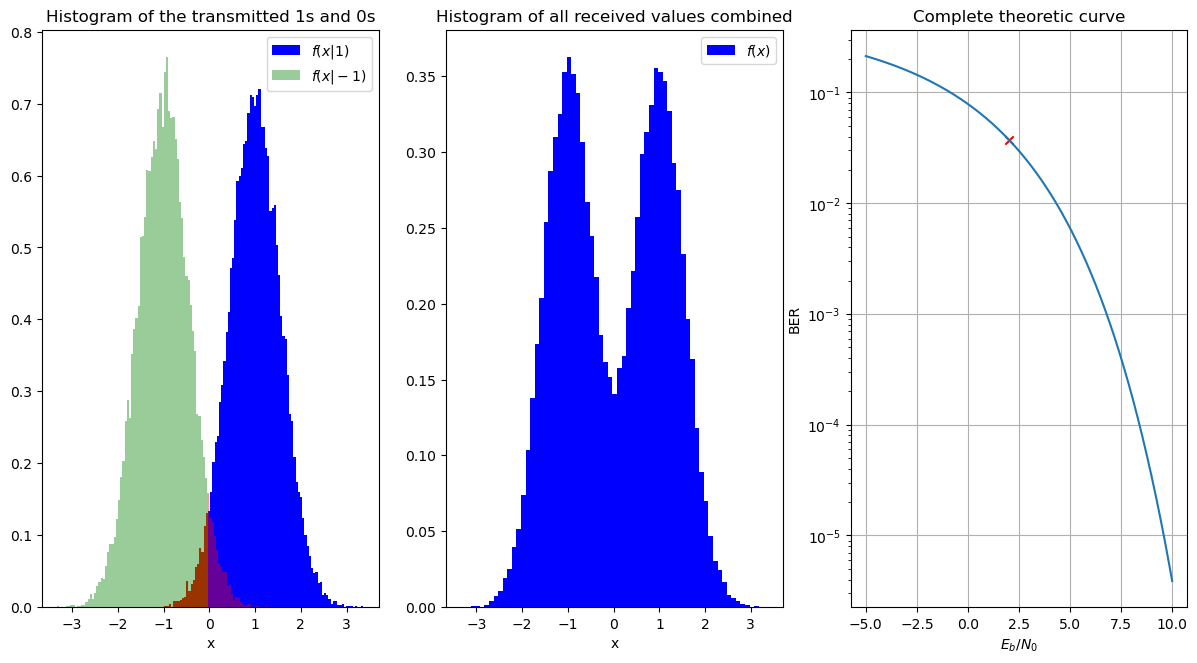

In [ ]:
def plot_hist_bpsk(es_no_dB, n_syms_log, equally_likely_bits):
    #dB into linear
    es_no_lin = 10**(es_no_dB/10)

    sigma = np.sqrt(1/(2*es_no_lin)) # Annahme: es = 1
    
    #calculate decision threshold based on MAP
    current_threshold = threshold_calc(p_0, sigma = sigma) # -> sigma = sigma übergibt den Parameter von oben (eine Zeile drüber ausgerechnet) an den Parameter sigma der Funktion
    num_sim = int(10**n_syms_log) #-> n_syms_log ergibt die Anzahl der Simulationen im Logarithmischen wieder; int macht aus dem Ergebnis eine Ganzzahl

    # Generate random Data according to given probabilities 
    binary_data = np.random.randint(low=0, high = 1000, size = num_sim)
    #print(binary_data)
    binary_data = np.where(binary_data < 1000*p_1,1,0) #-> Hier wird die Genauigkeit der Wahrscheinlichkeiten festgelegt; Die Wahrscheinlichkeit ist auf die 3.Nachkommastelle genau; 
    #print(binary_data)

    #Transmission
    modulated = bpsk_mod(binary_data) #-> die Nullen und Einsen von oben werden jetzt moduliert und auf -1 und 1 abgebildet
    transmitted = awgn(modulated, sigma) #-> das was gesendet wurde
    #print(transmitted)
    transmitted_1 = transmitted[binary_data == 0] #Das Array wird mit der Bolean Maske indexiert: 
    #Wenn der Wert in "binary data" eine 0 annimmt wird im Array der Gesendete Wert stehen
    transmitted_minus_1 = transmitted[binary_data == 1] # Wenn der Wert in "binary_data" eine 1 annimmt, dann wird im Array der gesendete Wert stehen
    #print(transmitted_1)
    #print(transmitted_minus_1)

    #Theory 
    eb_no_range_dB = np.linspace(-5,10,1000) #nimmt für das SNR in gleichmäßigen Abständen Werte zwischen -5 und 10
    eb_no_range = 10**(eb_no_range_dB/10) #-> Umrechnung in linearen Wert

    theoretic_ber_gv = qfunc(np.sqrt(2*eb_no_range)) # theoretisches SNR bei einer Gleichverteilung der Eingangsbits; siehe VL NT1 Folie 110 Kapitel 4

    sigma_range = np.sqrt(1/(2*eb_no_range)) # Rechnet aus dem SNR die Rauschvarianz aus; siehe oben, Annahme E_s = 1
    desicion_threshold = vec_threshold_calc(p_0, sigma_range) # calculates the MAP threshold for every sigma 

    
    #Plotting Histogram
    plt.figure(figsize = (20, 7.5))
    ax = plt.subplot(1,4,1)
    ax.set_title('Histogram of the transmitted 1s and 0s')
    N_1, bins_1, patches_1 = plt.hist(transmitted_1, density = True, color = 'b', bins = 'auto', label = '$f(x|1)$')
    for i in bins_1:
        print(summe + 2)
        
    N_minus_1, bins_minus_1, patches_minus_1 = plt.hist(transmitted_minus_1, density = True, color = 'g', bins = 'auto', alpha = 0.4, label = '$f(x|-1)$')
    plt.legend()
    plt.xlabel('x')

    #Plotting Histogram of all received values
    ax = plt.subplot(1,4,2) 
    plt.hist(transmitted, density = True, color = 'b', bins = 'auto', label = '$f(x)$')
    ax.set_title('Histogram of all received values combined')
    plt.legend()
    plt.xlabel('x')
    col_threshold = 'r'
    bins_1 = bins_1[1:] # entfernt das erste Element in Bins; bins_1 enthält immer ein Element mehr als die Anzahl der Balken; daher wird das erste Element gelöscht
    bins_minus_1 = bins_minus_1[1:] 
    
    # Monte Carlo --> Counter errors (Happens if theshold is crossed)
    errors = len(np.where(transmitted_1 <= current_threshold)[0]) + len(np.where(transmitted_minus_1 >= current_threshold)[0]) # np.where gibt ein Tupel von Arrays zurück, wobei das erste Array die die Indizes enthält; die 0 in eckigen 
    # Klammern extrahiert das erste Array mit den Indizes. Durch den Befehl len wird die Länge des Arrays ausgegeben

    # BER = errors/ numsim --> bit error rate === anzahl der Fehler / Anzahl der Simulationen
    simulated_ber = float(errors)/num_sim 
    #print(errors)

    # simulated ber corresponds to probability that error occurs --> can be used to calculate variance of a binomial distribution with simulated_ber being probanbility for one reralization (n= 1)--> Var = n*p*(1-p)
    theoretic_var = simulated_ber * (1-simulated_ber)/ num_sim #berechnet nicht die Gesamtvarianz, sondern die durchscnittliche Varianz über alle Simulationen hinweg; Einfluss der Anzahl der Simulationen auf die Varianz wird berücksichtigt

    # plot confidence erea around estimated point -> Konfidenz-Intervall
    theoretic_1_sigma_area = np.array(simulated_ber + 2* np.sqrt(theoretic_var), simulated_ber - 2*np.sqrt(theoretic_var)) # Bestimme die 2-Sigma Umgebung um die simulierte bit-error-rate

    ## Nur Plotting
    for i in range(len(np.where(bins_1 < current_threshold)[0])): # alle falsch übertragenen 1er (links der 0)
        patches_1[i].set_facecolor(col_threshold)
    for i in range(len(patches_minus_1)-1, len(patches_minus_1)-1-len(np.where(bins_minus_1 > current_threshold)[0]),-1): #len(patches_minus_1)-1 ist der Index des letzten Balkens im Histogramm
        # np.where(bins_minus_1 > current_threshold)[0] gibt die Indizes der Bins zurück, die größer als current treshold sind; Ausdruck [0] extrahiert die Indizes der bins
        #len(patches_minus_1)-1-len(np.where(bins_minus_1 > current_threshold)[0]): ermittelt den Startpunkt der Schleife, indem sie die Anzahl der Bins, die größer als current_threshold sind vom Index des letzten Balkens subtrahiert 
        # Der Schritt -1 bedeutet, dass die Schleife rückwärts durch die Indizes geht, d.h. sie beginnt beim letzten Index und geht dann mit jedem Schritt um eins zurück. So werden die Indizes von hinten nach vorne durchlaufen 
        # rechts der 0; alle falsch übertragenen -1er
        patches_minus_1[i].set_facecolor(col_threshold)

    #Plotting theoretical ber-graphic
    ax = plt.subplot(1,4,3)
    ax.set_title('Complete theoretic curve')
    plt.plot(eb_no_range_dB, theoretic_ber_gv)
    plt.scatter(es_no_dB, simulated_ber, marker = 'x', color = 'r')
    plt.yscale('log')
    plt.xlabel('$E_b/N_0$')
    plt.ylabel('BER')
    plt.grid()


plot_hist_bpsk(2, 4.8, 0)

# ML Decoding von 7-4 Hamming Code 
# 
hbhbhbhk